<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 14 Oktober 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **14 Oktober 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [33]:
# Isi dengan data diri Anda
NAMA = "FRIGAS HANIFYAN ZALWI"
KELAS = "B"
NPM = "2006596005"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["http://learningbox.coffeecup.com/05_1_decisiontree.html",
"https://www.rumusstatistik.com/2021/05/cara-menghitung-mae.html",
"https://www.khoiri.com/2020/12/cara-menghitung-root-mean-square-error-rmse.html",
"https://www.khoiri.com/2020/12/pengertian-dan-cara-menghitung-mean-squared-error-mse.html",
"https://accounting.binus.ac.id/2021/08/12/memahami-r-square-koefisien-determinasi-dalam-penelitian-ilmiah/",
"https://www.section.io/engineering-education/hyperparmeter-tuning/",
"https://id.gadget-info.com/difference-between-classification",
"https://www.trivusi.web.id/2022/06/algoritma-decision-tree.html"
]

In [34]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, FRIGAS HANIFYAN ZALWI dari kelas B dengan NPM 2006596005, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (FRIGAS HANIFYAN ZALWI)


# Dataset

Tugas ini menggunakan <b>Dataset Flight Price Prediction</b> <br>
(Sumber: https://www.kaggle.com/datasets/vinaypratap/flight-price-prediction-1 dengan perubahan.)  
Dataset terdiri dari:
 - 6 atribut 
    * Airline – Nama perusahaan penerbangan
    * Source – Kota asal keberangkatan
    * Destination – Kota tujuan
    * Total_Stops - Berapa banyak pesawatnya berhenti 
    * Additional_Info - Tambahan info terkait perjalanan tersebut
    * Duration_Hours - Berapa jam lama perjalanan 
 - 1 target
    * Price - Harga tiket perjalanan 
 - 10681 baris data

# Read Dataset

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

# Import data
df = pd.read_csv('Flight Price Prediction.csv')
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_Hours,Price
0,IndiGo,Banglore,New Delhi,0,No info,2.833333,3897
1,Air India,Kolkata,Banglore,2,No info,7.416667,7662
2,Jet Airways,Delhi,Cochin,2,No info,19.000000,13882
3,IndiGo,Kolkata,Banglore,1,No info,5.416667,6218
4,IndiGo,Banglore,New Delhi,1,No info,4.750000,13302


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Total_Stops      10681 non-null  int64  
 4   Additional_Info  10681 non-null  object 
 5   Duration_Hours   10681 non-null  float64
 6   Price            10681 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 584.2+ KB


# Data-Preprocessing

In [37]:
# One-hot encoding pada data nominal
df = pd.get_dummies(df, drop_first=True)

# Data-Processing

In [38]:
# Memisahkan features and label
X = df.drop('Price', axis=1)
y = df['Price'].to_frame()

In [39]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 25% dari data keseluruhan 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train)

,Total_Stops,Duration_Hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
5584,0,2.250000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8121,0,2.750000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10363,0,2.833333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9124,1,7.500000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9176,0,2.750000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,19.416667,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5191,1,6.666667,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5390,1,12.666667,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
860,0,2.750000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree adalah sebuah model yang menggunakan struktur berupa Binary  Tree (Setiap node memiliki maksimal 2 children). Decision Tree digunakan pada data science yang bersifat Supervised Learning (Model akan dibangun menggunakan data training, lalu selanjutnya akan digunakan untuk memprediksi output dari data yang diberikan). Data training yang dilakukan untuk melatih model akan diubah menjadi serangkaian aturan yang berbentuk Binary Tree. Aturan yang didapat tersebut  digunakan untuk proses prediksi pada data yang lainnya.

#### Training

In [40]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
# Melakukan training pada model decision tree
dt_md2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_md2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

#### Evaluasi

In [43]:
# Memprediksi data testing
prediction = dt_md2.predict(X_test)

# Call the metrics function
metrics(prediction)

MAE: 2400.183519409751
MSE: 11062616.181279806
RMSE: 3326.05113930616
R_squared: 0.46436131655623414


#### *Hyperparameter*

*Hyperparameter* merupakan parameter yang bisa kita ubah/atur nilainya sebelum kita membangun model yang akan digunakan. Tujuan dari perubahan parameter tersebut adalah untuk menghasilkan model yang harapannya bisa bekerja dengan lebih baik.  

>Terdapat beberapa hyperparameter pada berbagai algoritma *machine learning*, salah satunya adalah pada algoritma Decision Tree. Beberapa *hyperparameter* yang terdapat pada algoritma  Decision Tree di modul `sklearn.tree` adalah: 
- `criterion`: Kriteria untuk menilai seberapa bagus pemecahan node, di antaranya:
    - quared_error: variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node
    - friedman_mse: mean squared error with [Friedman’s improvement score](https://datascience.stackexchange.com/questions/66062/what-is-the-difference-between-freidman-mse-and-mse) for potential splits `(tenang gaakan muncul di ujian)`
    - absolute_error: minimizes the L1 loss using the median of each terminal node
    - poisson: uses reduction in [Poisson deviance](https://data.princeton.edu/wws509/notes/a2s5) to find splits
- `max_depth`: Kedalaman maksimal dari Tree
- `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node

Informasi lebih lanjut dapat dilihat pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [44]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dt_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_md6.fit(X_train, y_train)

# Memprediksi data testing
predicted6 = dt_md6.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted6)

MAE: 1686.2331042308267
MSE: 6273360.8419512585
RMSE: 2504.6678106989075
R_squared: 0.6962513489497466


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya tanpa max_depth model menghasilkan *MAE* 2400 dan *RMSE* 3326. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada peningkatan pada performa model dengan *MAE* 1686 dan *RMSE* 2504

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan

Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset travel insurance tanpa max depth:

In [45]:
from sklearn import tree

In [46]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- Airline_SpiceJet <= 0.50
|   |   |   |   |   |--- Airline_IndiGo <= 0.50
|   |   |   |   |   |   |--- Duration_Hours <= 1.38
|   |   |   |   |   |   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |   |   |   |   |   |--- Duration_Hours <= 1.29
|   |   |   |   |   |   |   |   |   |--- value: [3514.11]
|   |   |   |   |   |   |   |   |--- Duration_Hours >  1.29
|   |   |   |   |   |   |   |   |   |--- value: [3248.97]
|   |   |   |   |   |   |   |--- Airline_Jet Airways >  0.50
|   |   |   |   |   |   |   |   |--- value: [5678.00]
|   |   |   |   |   |   |--- Duration_Hours >  1.38
|   |   |   |   |   |   |   |--- Additional_Info_In-flight meal not included <= 0.50
|   |   |   |   |   |   |   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |   |   |   |   |   |   |--- Source_Chennai <= 0.50
|   |   |   |   |  

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [47]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(X_train, y_train)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- value: [4560.87]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- value: [6926.35]
|   |   |--- Duration_Hours >  2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- value: [6134.79]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- value: [8396.41]
|   |--- Airline_Jet Airways Business >  0.50
|   |   |--- value: [52229.00]
|--- Duration_Hours >  5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |--- Total_Stops <= 1.50
|   |   |   |   |--- value: [9382.83]
|   |   |   |--- Total_Stops >  1.50
|   |   |   |   |--- value: [12173.92]
|   |   |--- Airline_Jet Airways >  0.50
|   |   |   |--- Additional_Info_In-flight meal not included <= 0.50
|   |   |   |   |--- value: [14920.22]
|   |   |   |--- Addit

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*). 

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

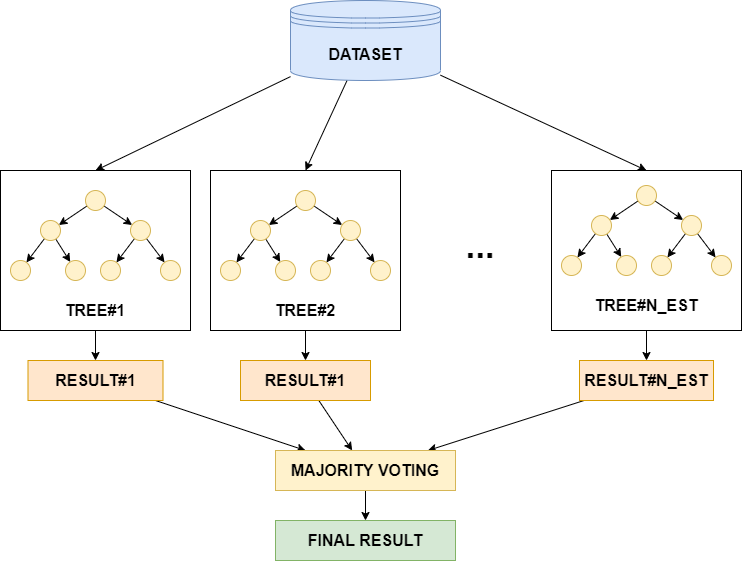

Sumber: Olahan Pribadi

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train, y_train)

# Memprediksi data testing
predicted = rf_md.predict(X_test)

# Menampilkan metrics
metrics(predicted)

C:\Users\frigas\AppData\Local\Temp\ipykernel_17276\1432445206.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md.fit(X_train, y_train)


MAE: 1393.1837186514183
MSE: 5858698.188421938
RMSE: 2420.4747857438915
R_squared: 0.7163288201527698


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan ntuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [50]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 20}

In [51]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train, y_train)
predicted = best_hp.predict(X_test)
metrics(predicted)

MAE: 1428.030002410246
MSE: 5398083.087455952
RMSE: 2323.377517205491
R_squared: 0.7386312540628646


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

# Latihan Soal

## SOAL 1

Implementasikan sebuah model Decision Tree untuk melakukan suatu task regresi yang memprediksi `Price` dari suatu penerbangan.

### SOAL 1a
[5] Bangun model decision tree dengan memberikan nilai pada *hyperparameter* 
- `max_depth = 5`
- `random_state = 2023`.

In [52]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dt_md7 = DecisionTreeRegressor(max_depth=5, random_state=2023)
dt_md7.fit(X_train, y_train)

# Memprediksi data testing


DecisionTreeRegressor(max_depth=5, random_state=2023)

### SOAL 1b
[5]  Visualisasikan model decision tree yang didapat pada soal 1a!

In [53]:
from matplotlib import pyplot as plt

Dengan menggunakan export tree didapatkan visualisasi seperti ini

In [54]:
print(tree.export_text(dt_md7, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- Airline_SpiceJet <= 0.50
|   |   |   |   |   |--- value: [4814.44]
|   |   |   |   |--- Airline_SpiceJet >  0.50
|   |   |   |   |   |--- value: [3711.83]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- Airline_SpiceJet <= 0.50
|   |   |   |   |   |--- value: [7218.93]
|   |   |   |   |--- Airline_SpiceJet >  0.50
|   |   |   |   |   |--- value: [4910.78]
|   |   |--- Duration_Hours >  2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- Total_Stops <= 1.50
|   |   |   |   |   |--- value: [6095.70]
|   |   |   |   |--- Total_Stops >  1.50
|   |   |   |   |   |--- value: [17432.00]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |   |   |--- value: [7443.58]
|   |   |   |   |--- Airline_Jet Airways >  0.50
|   |  

Dengan menggunakan plot tree didapatkan visualisasi seperti ini

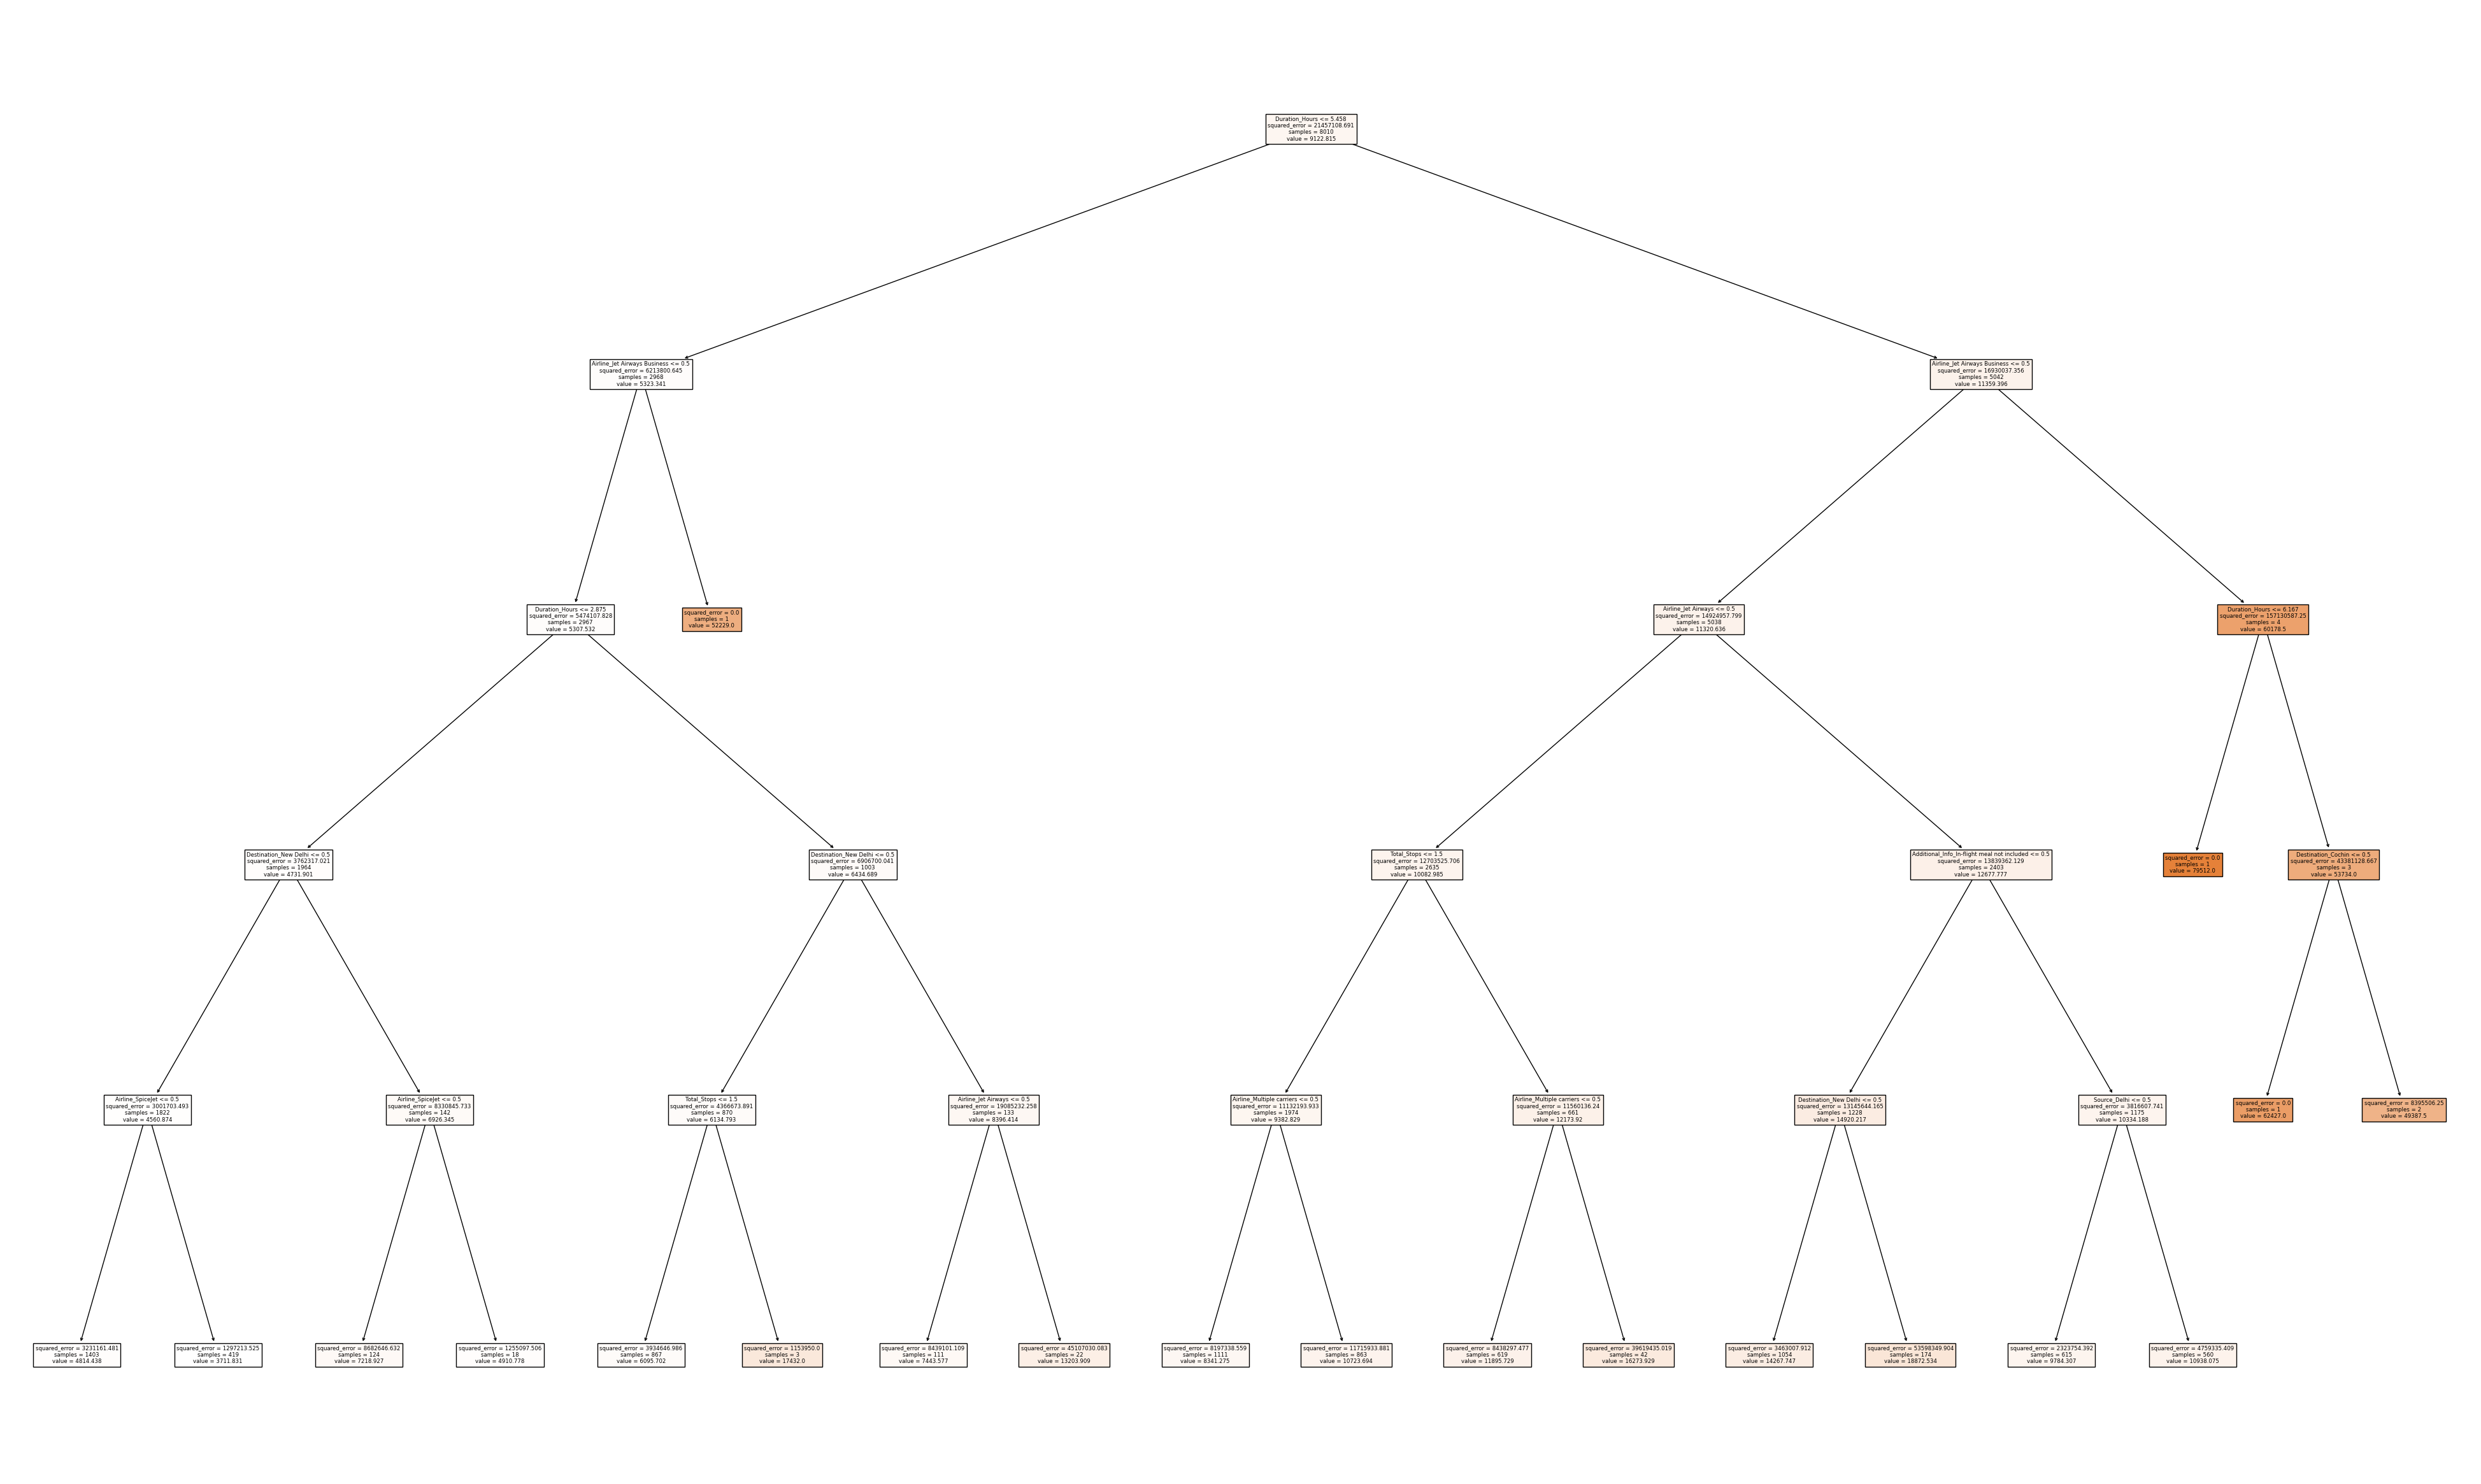

In [55]:
features = list(X_train.columns)
labels = [str(label) for label in list(y_train['Price'].unique())]


fig = plt.figure(figsize=(50, 30))
_ = tree.plot_tree(dt_md7, feature_names=features, class_names=labels, filled=True)

Saya menampilkan kedua jenis plot itu untuk mengetahui perbedaan dari kedua metode tersebut. Untuk export text cocok digunakan untuk mengetahui atribut-atirubut yang menghasilkan prediksi terdekat. Hal itu disebabkan hasil dari export text bersifat deskriptif sehingga fokus dengan tulisan-tulisan. Berbeda dengan plot tree yang berfokus dengan penggunaan visualisasi. Namun, pada plot tree ini kita bisa mengatahui banyaknya sample pada node tersebut. Hal inilah yang tidak ada pada export tree. Sejatinya tidak ada masalah ingin menggunakan export text atau plot tree, tinggal disesuaikan saja dengan kebutuhan yang diperlukan

### SOAL 1c

[5]  Jika model diberikan data aktual Price 7500, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Price` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini
Duration Hours <= 5.458 (True)
Airline Jet Airways Business <= 0.5 (True)
Duration Hours <= 2.875 (False)
Destination New Delhi <= 0.5 (False)
Airline Jet Airways <= 0.5 (True)

Dengan demikian atribut yang ada adalah 
Duration Hours : 2.876 - 5.458
Airline Jet Airways Business <= 0.5
Destination New Delhi > 0.5
Airline Jet Airways <= 0.5


Mean Absolute Error = Absolute Error/ banyaknya data = $\frac{|7500 - 7443.577|}{1}$ = $56.423$

## SOAL 2

Implementasikan sebuah model Decision Tree untuk melakukan suatu task *regresi* yang memprediksi `Price` dari suatu penerbangan. Implementasi pada soal ini akan menggunakan nilai *hyperparameter* 
- `max_depth = 3` 
- `min_samples_split = 50`
- `random_state = 2023`

### SOAL 2a
[5]  Bangun model decision tree sesuai ketentuan.

In [56]:
dt_md8 = DecisionTreeRegressor(max_depth=3, random_state=2023, min_samples_split=50)
dt_md8.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, min_samples_split=50, random_state=2023)

### SOAL 2b
[5]  Visualisasikan model decision tree yang didapat pada soal 2a!

Dengan menggunakan export text didapatkan visualisasi seperti ini

In [57]:
print(tree.export_text(dt_md8, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- value: [4731.90]
|   |   |--- Duration_Hours >  2.88
|   |   |   |--- value: [6434.69]
|   |--- Airline_Jet Airways Business >  0.50
|   |   |--- value: [52229.00]
|--- Duration_Hours >  5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |--- value: [10082.98]
|   |   |--- Airline_Jet Airways >  0.50
|   |   |   |--- value: [12677.78]
|   |--- Airline_Jet Airways Business >  0.50
|   |   |--- value: [60178.50]



Dengan menggunakan plot tree didapatkan visualisasi seperti ini

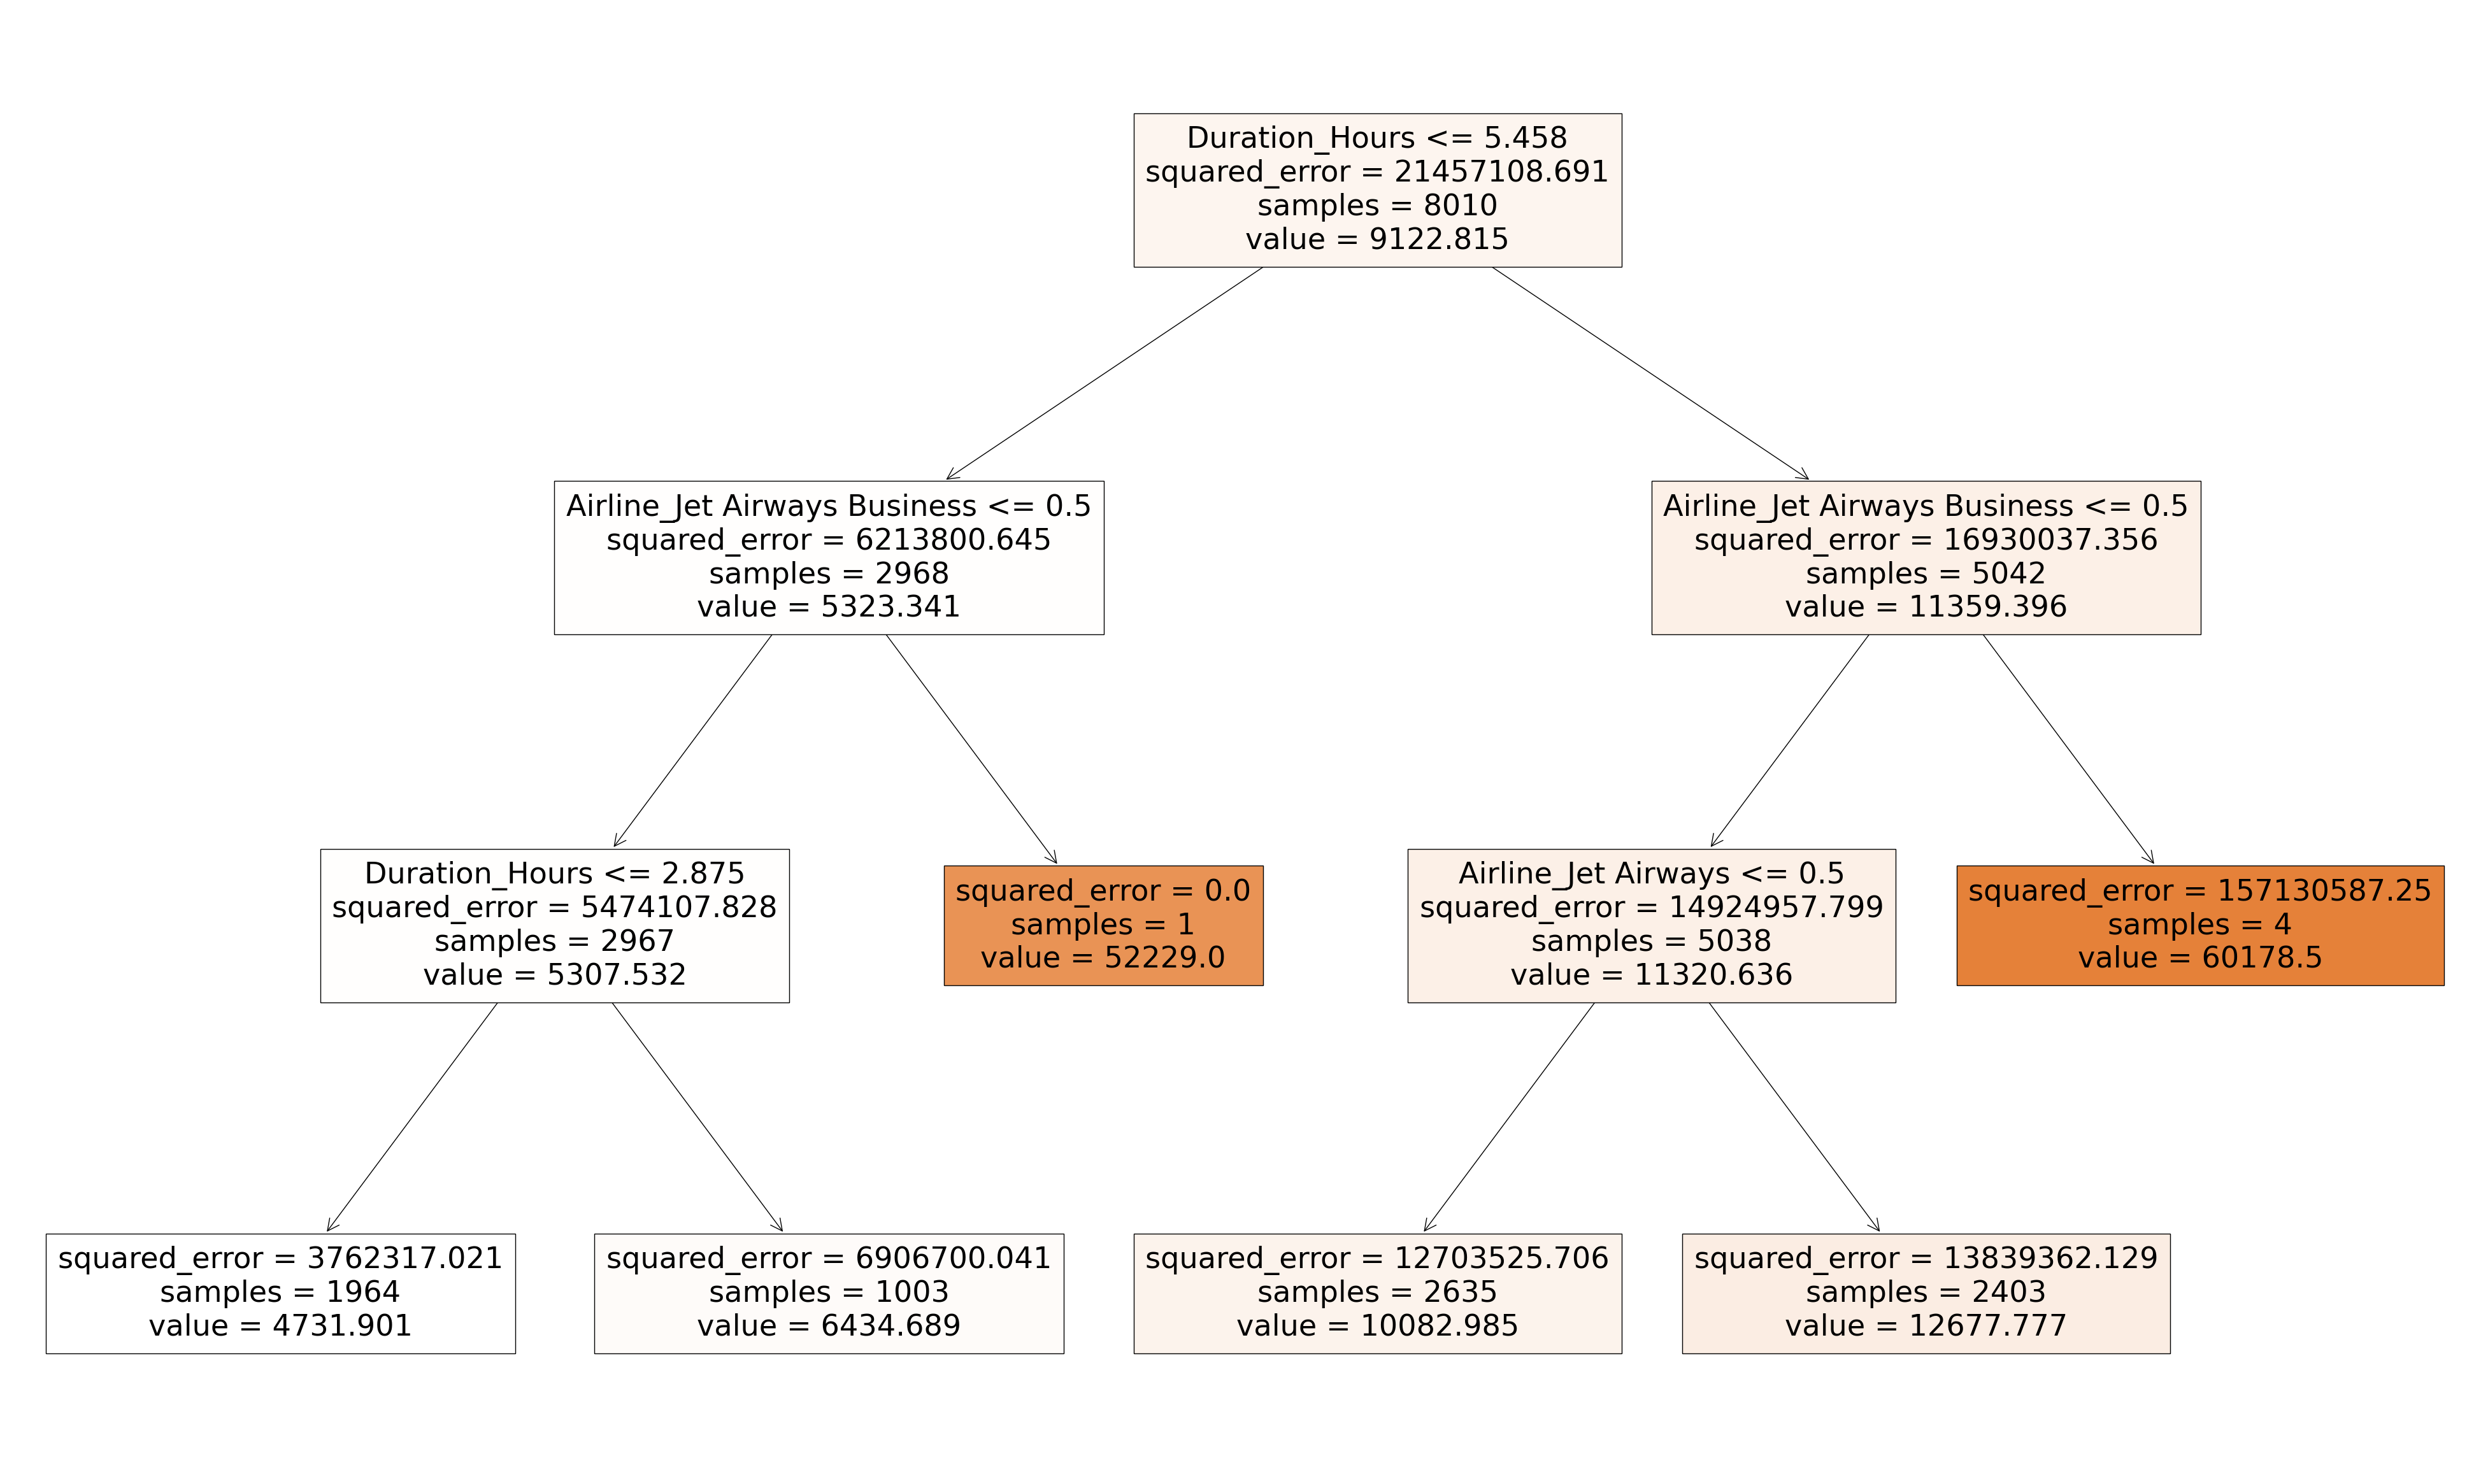

In [58]:
features = list(X_train.columns)
labels = [str(label) for label in list(y_train['Price'].unique())]

fig = plt.figure(figsize=(50, 30))
_ = tree.plot_tree(dt_md8, feature_names=features, class_names=labels, filled=True)

Saya menampilkan kedua jenis plot itu untuk mengetahui perbedaan dari kedua metode tersebut. Untuk export text cocok digunakan untuk mengetahui atribut-atirubut yang menghasilkan prediksi terdekat. Hal itu disebabkan hasil dari export text bersifat deskriptif sehingga fokus dengan tulisan-tulisan. Berbeda dengan plot tree yang berfokus dengan penggunaan visualisasi. Namun, pada plot tree ini kita bisa mengatahui banyaknya sample pada node tersebut. Hal inilah yang tidak ada pada export tree. Sejatinya tidak ada masalah ingin menggunakan export text atau plot tree, tinggal disesuaikan saja dengan kebutuhan yang diperlukanSaya menampilkan kedua plot tersebut untuk mendapatkan banyak sample pada suatu node agar dapat menghitung nomor berikutnya


### SOAL 2c

[5]  Jika model diberikan data aktual Price 7500, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Price` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Duration Hours <= 5.458 (True)
Airline Jet Airways Business <= 0.5 (True)
Duration Hours <= 2.875 (False)

Dengan demikian atribut yang cocok adalah :
Duration Hours : 2.876 - 5.458
Airline Jet Airways Business <= 0.5

Mean Absolute Error = Absolute Error/ banyaknya data = $\frac{|7500 - 6434.689|}{1}$ = $1065.311$


## SOAL 3
[5]

Implementasikan sebuah model Random Forest untuk melakukan suatu task *regresi* yang memprediksi `Price` dari suatu penerbangan. Implementasi pada soal ini akan menggunakan nilai *hyperparameter* 
- `max_depth = 5`
- `random_state = 2023`

In [59]:
rf_md = RandomForestRegressor(max_depth=5, random_state=2023)
rf_md.fit(X_train, y_train)

C:\Users\frigas\AppData\Local\Temp\ipykernel_17276\140970303.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, random_state=2023)

## SOAL 4

[15]
* Lakukan prediksi terhadap data *testing* (`X_test`) menggunakan model yang sudah dibangun pada soal 1, 2, dan 3.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [60]:
print("Prediksi soal 1")
print("")
predicted7 = dt_md7.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted7)

print("")
print("Prediksi soal 2")
print("")
predicted8= dt_md8.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted8)

print("")
print("Prediksi soal 3")
print("")
predicted9 = rf_md.predict(X_test)

metrics(predicted9)


Prediksi soal 1

MAE: 1732.8164641031087
MSE: 6533478.306130572
RMSE: 2556.0669604160553
R_squared: 0.6836567715215329

Prediksi soal 2

MAE: 2183.972453051509
MSE: 9673264.00278132
RMSE: 3110.1871330807926
R_squared: 0.5316320922512257

Prediksi soal 3

MAE: 1667.1120096129114
MSE: 6464319.364332517
RMSE: 2542.5025790218024
R_squared: 0.6870053650120818


Dari melihat ketiga prediksi ini didapatkan beberapa poin kesimpulan :
1. Terlihat dari ketiga prediksi tersebut, prediksi pada soal 3 memiliki nilai MAE (Mean Absolute Error) terkecil dan prediksi soal 2 memiliki MAE terbesar. MAE digunakan untuk mengukur keakuratan suatu model statistik dalam melakukan prediksi atau peramalan. Diketahui semakin kecil nilai MAE dari sebuah model maka model tersebut semakin baik. Dengan demikian, diketahui bahwa prediksi soal 3 merupakan model yang baik diantara ketiga model yang ada.
2. Terlihat dari ketiga prediksi tersebut, prediksi pada soal 3 memiliki nilai MSE (Mean Squared Error) terkecil dan prediksi soal 2 memiliki MSE terbesar. MSE digunakan untuk mengecek estimasi berapa banyak nilai kesalahan pada model prediksi. Diketahui apabila nilai MSE semakin rendah atau mendekati 0 menunjukkan bahwa hasil model prediksi sesuai dengan data aktual. Dengan demikian, prediksi soal 3 merupakan prediksi yang paling tepat dibanding ketiga model yang ada
3. Terlihat dari ketiga prediksi tersebut, prediksi pada soal 3 memiliki nilai RMSE (Root Mean Squared Error) terkecil dan prediksi soal 2 memiliki RMSE terbesar. RMSE digunakan untuk perbedaan nilai dari prediksi sebuah model sebagai estimasi atas nilai yang diobservasi. Diketahui apabila nilai RMSE semakin rendah atau mendekati 0 menunjukkan bahwa hasil model prediksi lebih akurat. Dengan demikian, prediksi soal 3 merupakan prediksi yang paling akurat dibanding ketiga model yang ada
4. Terlihat dari ketiga prediksi tersebut, prediksi pada soal 3 memiliki nilai R squared terbesar dan prediksi soal 2 memiliki R Squared terkecil. R squared merupakan suatu nilai yang memperlihatkan seberapa besar variabel independen (eksogen) mempengaruhi variabel dependen (endogen). Diketahui apabila nilai R squared semakin besar maka nilai komponen errornya kecil. Dengan demikian, prediksi soal 3 memiliki nilai komponen error terkecil dibandingkan ketiga model yang ada
5. Dari poin 1-4 dapat didimpulkan bahwa prediksi 3 lebih baik dibanding prediksi 1 dan prediksi 2. Oleh karena itu, penggunaan Randon Forest lebih cocok digunakan pada data ini

## SOAL 5

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest. 

### Soal 5a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [86]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [30,40,50,60,70],
               'max_depth' : [11,16,17,18,19,20, None]}

dt = DecisionTreeRegressor()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [11, 16, 17, 18, 19, 20, None],
                         'min_samples_split': [30, 40, 50, 60, 70]})

### Soal 5b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search

In [87]:
display(clf.best_params_)

{'criterion': 'squared_error', 'max_depth': 16, 'min_samples_split': 30}

### Soal 5c
[5]

Buatlah model Random Forest berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [88]:
rf_md = RandomForestRegressor(max_depth=16, min_samples_split=30,criterion="squared_error")
rf_md.fit(X_train, y_train)

C:\Users\frigas\AppData\Local\Temp\ipykernel_17276\372923617.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md.fit(X_train, y_train)


RandomForestRegressor(max_depth=16, min_samples_split=30)

### Soal 5d
[5]

Lakukan prediksi dengan X_test dan **munculkan** hasil evaluasi terhadap label y_test


In [89]:
predicted9 = rf_md.predict(X_test)

metrics(predicted9)

MAE: 1416.958865454598
MSE: 5569155.55912599
RMSE: 2359.905836919344
R_squared: 0.7303481289867301


## SOAL 6
[15]
1. Jelaskan apa fungsi _hyperparameter_ min_samples_split dan apa yang terjadi apabila kita memasang angka yang terlalu besar (misal 10000)?
2. Apa bedanya min_samples_split dengan min_samples_leaf?
3. Sebutkan kelebihan dan kekurangan menggunakan GridSearch!

Jawaban :
1. min_samples_split berfungsi sebagai jumlah sampel minimum yang diperlukan untuk membelah node nantinya. Apabila pembagian min_samples_split dimasukkan dengan nilai yang sangat besar akan menyebabkan pembagian model menghasilkan hasil yang kurang spesifik. Kita ambil contoh apabila kita memasukkannilai min_samples_split=10000. Apabila program telah menemukan suatu node yang terdapat banyak samplesnya kurang dari min_samples_split maka node tersebut berhenti dan tidak melanjutkan pembagiannya. Dengan demikian, terdapat hubungan antara min samples spit yang semakin besar akan membuat cabang dari node semakin dikit. Hal itu dapat menyebabkan
2. min_samples _split memiliki tujuan untuk memberhentikan suatu pembagian node apabila banyaknya sample pada node tersebut sudah kurang dari value dari min_samples_split. Sedangkan untuk min_samples_leaf memiliki tujuan untuk meninjau jumlah sample dari setaip hasil percabangan node nilainya lebih besar dibanding min_samples_leaf. Apabila salah satu percabangannya(cabang kiri atau kanan) memiliki nilai sample lebih kecil dibanding nilai min_samples_leaf maka percabangan node itu tidak jadi dilakukan.
3.  Kelebihan : 
     - Penggunaan grid search adalah dapat memudahkan kita menemukan nilai dari suatu hyperparameter yang cocok digunakan pada dataset kita. Hal itu disebabkan nilai-nilai hyperparameter yang kita telah simpan pada sebuah matriks akan diuji dan ditinjai kecocokannya. Hal itu akan menghasilkan suatu kondisi atau akurasi terbaik dari hyperparameter-hyperparameter yang telah kita cantumkan
    Kekurangan :
     - Waktu komputasi yang dibutuhkan gridsearch sangat bergantung dengan banyaknya matriks yang ada. Apabila nilai yang dicantumkan sangat banyak akan menyebabkan waktu komputasi sangat lama. Sesuai yang telah disebutkan tadi, grid search akan meninjau setiap hubungan yang dapat dibentuk oleh hyperparameter tersebut. Misalkan apabila terdapat m hyperparameter yang ingin ditinjau dan setiap parameter tersebut memiliki n value. Dengan demikian, komputasi yang dilakukan akan sebanyak mn. 


## SOAL 7
[15]

1. Pada dataset yang seperti apa kita menggunakan Decision Tree sebagai model kita?
2. Apa yang terjadi apabila kita menggunakan DecisionTreeClasifier sebagai model untuk masalah regresi? Bagaimana juga jika DecisionTreeRegressor digunakan untuk masalah klasifikasi? Jelaskan apa saja masalahnya!

Jawaban :
1. Decision Tree sangat cocok digunakan apabila atribut-atribut yang ada pada dataset tersebut memiliki korelasi yang tinggi. Selain itu, apabila dataset memiliki banyak atribut yang memiliki nilai bertipe object (bukan numerik). 
2.  Apabila DecisionTreeClasifier dijalankan untuk masalah regresi, metode ini tetap bisa menjalankannya. Begitu pula dengan DecisionTreeRegressor ketika menjalankan masalah klasifikasi. Metode tersebut tetap dapat menjalankannya juga. Namun, perli diketahui  clasifier berfokus untuk mengeluarkan output yang bertipe kategorial, metode tersebut bukan menghasilkan data yang bertipe numerical, misalnya tipe data Float atau Integer. Begitu pula dengan regressor yang berfokus untuk mengeluarkan data yang bertipe numerical, metode tersebut bukan menghasilkan data yang bertipe categorical, misalnya tipe data String. Hal itu dapat dilihat dengan dataset saat ini yang memanfaatkan one hot encoding pada tipe ddata categorical, sehingga seluruh data yang ada bersifat integer. Apabila dipaksakan menjalankan kedua metode tersebut pada kasus-kasus yang tidak sesuai hasil prediksi dapat menimbulkan ketidakakuratan, tetapi tetap dapat dijalankannya dan tidak menyebabkan error.